In [6]:
from db_thread_detail_data import execute_sql_query
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import os
import sys
import numpy as np
import seaborn as sns


In [61]:
NANG = "livegalileo"
NANU = "liveuranus"
KENMO = "news1"

board = NANG

view_name = "view_" + board
day = f"{view_name}_daily_comment_count"
hour = f"{view_name}_hourly_comment_count"
id = f"{view_name}_daily_unique_id_percentage"

sql = f'select * from {day} WHERE date >= "2023-03-20"'
dailycount = execute_sql_query(sql)

sql = f'select * from {hour}'
hourlycount = execute_sql_query(sql)

sql = f'select * from {id} WHERE date >= "2023-03-20"'
unipe_id_count = execute_sql_query(sql)


In [62]:
dailycount

[('2023-03-20', 98),
 ('2023-03-21', 801),
 ('2023-03-22', 609),
 ('2023-03-23', 8831),
 ('2023-03-24', 14730),
 ('2023-03-25', 19658),
 ('2023-03-26', 20388),
 ('2023-03-27', 17345),
 ('2023-03-28', 15895),
 ('2023-03-29', 17672),
 ('2023-03-30', 19601),
 ('2023-03-31', 17726),
 ('2023-04-01', 22830),
 ('2023-04-02', 17856),
 ('2023-04-03', 18165),
 ('2023-04-04', 18951),
 ('2023-04-05', 17026),
 ('2023-04-06', 14356),
 ('2023-04-07', 16275),
 ('2023-04-08', 15284),
 ('2023-04-09', 16238),
 ('2023-04-10', 14633),
 ('2023-04-11', 13801),
 ('2023-04-12', 13523),
 ('2023-04-13', 12971),
 ('2023-04-14', 12763),
 ('2023-04-15', 17126),
 ('2023-04-16', 15742),
 ('2023-04-17', 13702),
 ('2023-04-18', 44511),
 ('2023-04-19', 21986),
 ('2023-04-20', 15677),
 ('2023-04-21', 14825),
 ('2023-04-22', 16180),
 ('2023-04-23', 16931),
 ('2023-04-24', 14402),
 ('2023-04-25', 17712),
 ('2023-04-26', 17720),
 ('2023-04-27', 15740),
 ('2023-04-28', 15632),
 ('2023-04-29', 17104),
 ('2023-04-30', 17850),


In [63]:
unipe_id_count

[('2023-03-20', 39.56),
 ('2023-03-21', 10.78),
 ('2023-03-22', 13.09),
 ('2023-03-23', 5.11),
 ('2023-03-24', 5.49),
 ('2023-03-25', 3.81),
 ('2023-03-26', 5.7),
 ('2023-03-27', 6.34),
 ('2023-03-28', 6.68),
 ('2023-03-29', 5.57),
 ('2023-03-30', 6.04),
 ('2023-03-31', 8.34),
 ('2023-04-01', 4.38),
 ('2023-04-02', 8.25),
 ('2023-04-03', 8.45),
 ('2023-04-04', 8.06),
 ('2023-04-05', 7.39),
 ('2023-04-06', 10.04),
 ('2023-04-07', 9.35),
 ('2023-04-08', 7.75),
 ('2023-04-09', 6.88),
 ('2023-04-10', 8.63),
 ('2023-04-11', 9.01),
 ('2023-04-12', 8.9),
 ('2023-04-13', 11.48),
 ('2023-04-14', 10.38),
 ('2023-04-15', 8.39),
 ('2023-04-16', 8.56),
 ('2023-04-17', 11.25),
 ('2023-04-18', 5.13),
 ('2023-04-19', 8.31),
 ('2023-04-20', 9.1),
 ('2023-04-21', 9.0),
 ('2023-04-22', 7.38),
 ('2023-04-23', 7.44),
 ('2023-04-24', 14.22),
 ('2023-04-25', 23.84),
 ('2023-04-26', 20.8),
 ('2023-04-27', 23.66),
 ('2023-04-28', 17.01),
 ('2023-04-29', 19.89),
 ('2023-04-30', 23.13),
 ('2023-05-01', 19.28),
 

## ID検索

In [30]:
def get_count_tikutiku(table_name, target_colum, keywords, date=""):
    or_conditions = " OR ".join([f"{target_colum} LIKE '%{kw}%'" for kw in keywords])
    if or_conditions:
        or_conditions = "WHERE " + or_conditions
    if date:
        date_condition = f"AND comment_time LIKE '%{date}%'"
    else:
        date_condition = ""
    sql = f'''
        SELECT count(*) as cnt
        FROM {table_name}
        {or_conditions}
        {date_condition}
    '''
    return execute_sql_query(sql)[0][0]


In [29]:
def get_topid_from_keyword(table_name, target_colum, keywords, date=""):
    or_conditions = " OR ".join([f"{target_colum} LIKE '%{kw}%'" for kw in keywords])
    if or_conditions:
        or_conditions = "WHERE " + or_conditions
    if date:
        date_condition = f"AND comment_time LIKE '%{date}%'"
    else:
        date_condition = ""
    sql = f'''
        SELECT post_id,count(*) as cnt
        FROM {table_name}
        {or_conditions}
        {date_condition}
        GROUP BY post_id
        ORDER BY cnt DESC
        Limit 10
    '''
    return execute_sql_query(sql)




In [28]:
#tian = ["ちくちく", "治安", "荒れ", "自治"]
#tikutiku = ["くっさ","ガイジ","ハッタショ","発達","発達障害","対立","対立煽り","FAX","通報","安倍晋三になれ","過疎","キッモ","キショ","キモ","つまらん","死ね","氏ね","しね","あっそ","だから","きもちわり","逃亡","帰れ","かえれ","つまんね","つまんない"]

# tian = ["通報", "規制", "言う", "思う", "自治"]
# tikutiku = ["荒らす", "煽る", "叩く"]

kusa = ["草"]

In [178]:
get_topid_from_keyword(f"db_{NANG}", "comment", tikutiku)


[('FyZUnIII0', 25),
 ('HBEHe1uQa', 23),
 ('vJxcfP6b0', 22),
 ('yCvzv0TU0', 20),
 ('friCmIpK0', 20),
 ('ZVo6x/Prr', 20),
 ('WY2t38rKd', 20),
 ('Koncy4ts0', 20),
 ('8eeZsf8P0', 20),
 ('m/z5uSGa0', 17)]

In [235]:
target_day = "2023-05-10"
tikutiku_count = get_count_tikutiku(f"db_{NANG}", "comment", tikutiku,target_day)
sql = f'select sum_comment from {day} WHERE date like "%{target_day}%"'
all_cnt_day = execute_sql_query(sql)[0][0]
(all_cnt_day / tikutiku_count) * 100 



51.526579870790016

In [72]:
from datetime import datetime, timedelta

def calculate_tikutiku_ratio(word_list, start_date, end_date):
    result = {}
    current_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")

    while current_date <= end_date:
        target_day = current_date.strftime("%Y-%m-%d")
        kusa_count = get_count_tikutiku(f"db_{NANG}", "comment", word_list, target_day)
        sql = f'select sum_comment from {day} WHERE date like "%{target_day}%"'
        all_cnt_day = execute_sql_query(sql)[0][0]
        ratio = (kusa_count / all_cnt_day) * 100
        result[target_day] = round(ratio, 2)

        current_date += timedelta(days=1)

    return result

kusa_raito_list = calculate_tikutiku_ratio(kusa, "2023-03-20", "2023-06-10")
kusa_raito_list

{'2023-03-20': 2.04,
 '2023-03-21': 2.87,
 '2023-03-22': 2.96,
 '2023-03-23': 2.85,
 '2023-03-24': 2.97,
 '2023-03-25': 3.85,
 '2023-03-26': 3.45,
 '2023-03-27': 2.66,
 '2023-03-28': 2.96,
 '2023-03-29': 2.91,
 '2023-03-30': 3.24,
 '2023-03-31': 2.83,
 '2023-04-01': 2.8,
 '2023-04-02': 2.45,
 '2023-04-03': 2.56,
 '2023-04-04': 2.71,
 '2023-04-05': 2.97,
 '2023-04-06': 3.09,
 '2023-04-07': 2.38,
 '2023-04-08': 3.32,
 '2023-04-09': 3.08,
 '2023-04-10': 2.72,
 '2023-04-11': 2.99,
 '2023-04-12': 2.74,
 '2023-04-13': 2.43,
 '2023-04-14': 2.95,
 '2023-04-15': 3.25,
 '2023-04-16': 3.32,
 '2023-04-17': 3.11,
 '2023-04-18': 3.64,
 '2023-04-19': 3.19,
 '2023-04-20': 2.3,
 '2023-04-21': 2.22,
 '2023-04-22': 2.9,
 '2023-04-23': 3.48,
 '2023-04-24': 2.33,
 '2023-04-25': 1.75,
 '2023-04-26': 2.04,
 '2023-04-27': 2.04,
 '2023-04-28': 2.44,
 '2023-04-29': 2.78,
 '2023-04-30': 2.58,
 '2023-05-01': 2.44,
 '2023-05-02': 2.29,
 '2023-05-03': 2.39,
 '2023-05-04': 2.61,
 '2023-05-05': 2.93,
 '2023-05-06': 2

In [244]:
from datetime import datetime, timedelta

def calculate_tikutiku_ratio(word_list, start_date, end_date):
    result = {}
    current_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")

    while current_date <= end_date:
        target_day = current_date.strftime("%Y-%m-%d")
        tikutiku_count = get_count_tikutiku(f"db_{NANG}", "comment", word_list, target_day)
        sql = f'select sum_comment from {day} WHERE date like "%{target_day}%"'
        all_cnt_day = execute_sql_query(sql)[0][0]
        ratio = (all_cnt_day / tikutiku_count) * 100
        result[target_day] = round(ratio, 2)

        current_date += timedelta(days=1)

    return result

tikuitku_raito_list = calculate_tikutiku_ratio(tikutiku, "2023-03-20", "2023-05-25")
tianraito_list = calculate_tikutiku_ratio(tian, "2023-03-20", "2023-05-25")

In [249]:
tianraito_list
tikuitku_raito_list

{'2023-03-20': 22.63,
 '2023-03-21': 184.56,
 '2023-03-22': 140.65,
 '2023-03-23': 2039.49,
 '2023-03-24': 3378.44,
 '2023-03-25': 4519.08,
 '2023-03-26': 4644.19,
 '2023-03-27': 3960.05,
 '2023-03-28': 3637.3,
 '2023-03-29': 4053.21,
 '2023-03-30': 4495.64,
 '2023-03-31': 4093.76,
 '2023-04-01': 5236.24,
 '2023-04-02': 4095.41,
 '2023-04-03': 4175.86,
 '2023-04-04': 4307.05,
 '2023-04-05': 3887.21,
 '2023-04-06': 3300.23,
 '2023-04-07': 3715.75,
 '2023-04-08': 3505.5,
 '2023-04-09': 3741.47,
 '2023-04-10': 3318.14,
 '2023-04-11': 3165.37,
 '2023-04-12': 3094.51,
 '2023-04-13': 2961.42,
 '2023-04-14': 2913.93,
 '2023-04-15': 3857.21,
 '2023-04-16': 3618.85,
 '2023-04-17': 3157.14,
 '2023-04-18': 10025.0,
 '2023-04-19': 4985.49,
 '2023-04-20': 3603.91,
 '2023-04-21': 3408.05,
 '2023-04-22': 3702.52,
 '2023-04-23': 3856.72,
 '2023-04-24': 3280.64,
 '2023-04-25': 4034.62,
 '2023-04-26': 4009.05,
 '2023-04-27': 3610.09,
 '2023-04-28': 3544.67,
 '2023-04-29': 3843.6,
 '2023-04-30': 4075.34,

In [23]:
word1 = "O32SxVS7"
word2 = "c6beuJur0"

word1_count = f'select comment from db_{NANG} where post_id like "%{word1}%"'
execute_sql_query(word1_count)

[(' 使ったこと無いんやが火を付けたら部屋に香りが広がる感じなん？  それとも近くで呼吸して楽しむもんなん？',),
 (' はえ〜',),
 (' &gt;&gt;46  正直最初コイツ思い出したわ  てか通報されてて草なんだ',),
 (' ホモとかレズが見てる分にはそこまで抵抗ないのは創作やポルノの賜物やね',),
 (' 逆に昔は虫は普通に食われてたんちゃうかな  そんなことはないんかな  海と違って可食部が少なすぎるから無理か',),
 (' 宇多田ヒカルのピノコ  かつて無いレベルの衝撃やった  絶対的なインパクトを残すって意味では凄い',),
 (' ウニみたいな形してそう',),
 (' 開けていく  https://i.imgur.com/VeNnyjT.jpg',),
 (' WBCメンバーがええなぁ',),
 (' 一つ目  https://i.imgur.com/WTzpRJk.jpg    長岡は嬉しい��  コイツは大成するとワイは思っとる',),
 (' 二つ目    https://i.imgur.com/wTNw0Nf.jpg    うーん',),
 (' 三つ目    https://i.imgur.com/ueUzg0W.jpg    ううん？',),
 (' 四つ目  https://i.imgur.com/vEDu5zI.jpg    嶋は嬉しい��',),
 (' ポテチ4つをを消費するの辛い',),
 (' ヤクルトも二連勝やし気分エエわ  負けが込んでる時は結果だけ見てたけどそろそろ観戦しよ',),
 (' !stop',),
 (' 偶然やろ',),
 (' やっぱHやろ',),
 (' ←絵文字  (＾Д＾)←顔文字    こうちゃうん？',),
 (' 次は3時間か',),
 (' ほな3時間後にまた',),
 (' ←ゆめちゃんって言うのをやめろは多分自治になるからこういうスレ建てる前に要望スレでお伺いたてたら',),
 (' ハーモニカは任せろ',),
 (' !pay:3:ID:O32SxVS7r    こんな感じIDいるで',),
 (' 金玉現れたんや  金玉擁護も規制でええやろ',),
 (' 1日とか3日とかの短期安倍晋三規制でも三回規制されたら永久でもいい気はする',),
 (' やらかしを繰り

In [117]:
danG = (1356 + 712)
bouG = (294 + 3183)
danG / bouG * 100

59.47656025309175

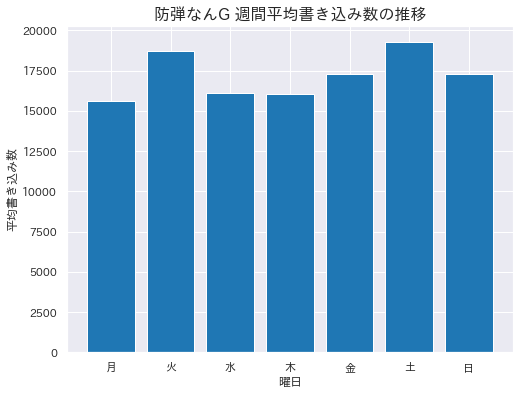

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

data = dailycount
df = pd.DataFrame(data, columns=['date', 'sum_comment'])
df['date'] = pd.to_datetime(df['date'])

# 4/18のデータを除外する
# df = df[df['date'] != '2023-04-18']

# 曜日を表すカラムを追加する（0: 月曜日, 1: 火曜日, ..., 6: 日曜日）
df['weekday'] = df['date'].dt.weekday

# 曜日ごとに平均書き込み数を計算する
mean_by_weekday = df.groupby('weekday')['sum_comment'].mean()

# グラフを描画する
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(mean_by_weekday.index, mean_by_weekday, color='tab:blue')

# x軸のラベルを設定する
ax.set_xlabel('曜日')
ax.set_xticks(mean_by_weekday.index)
ax.set_xticklabels(['月', '火', '水', '木', '金', '土', '日'])

# y軸のラベルを設定する
ax.set_ylabel('平均書き込み数')

# グラフのタイトルを設定する
ax.set_title('防弾なんG 週間平均書き込み数の推移', fontsize=16)

# グラフを表示する
plt.show()

2023-06-04 09:20:20.952 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-04 09:20:20.953 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


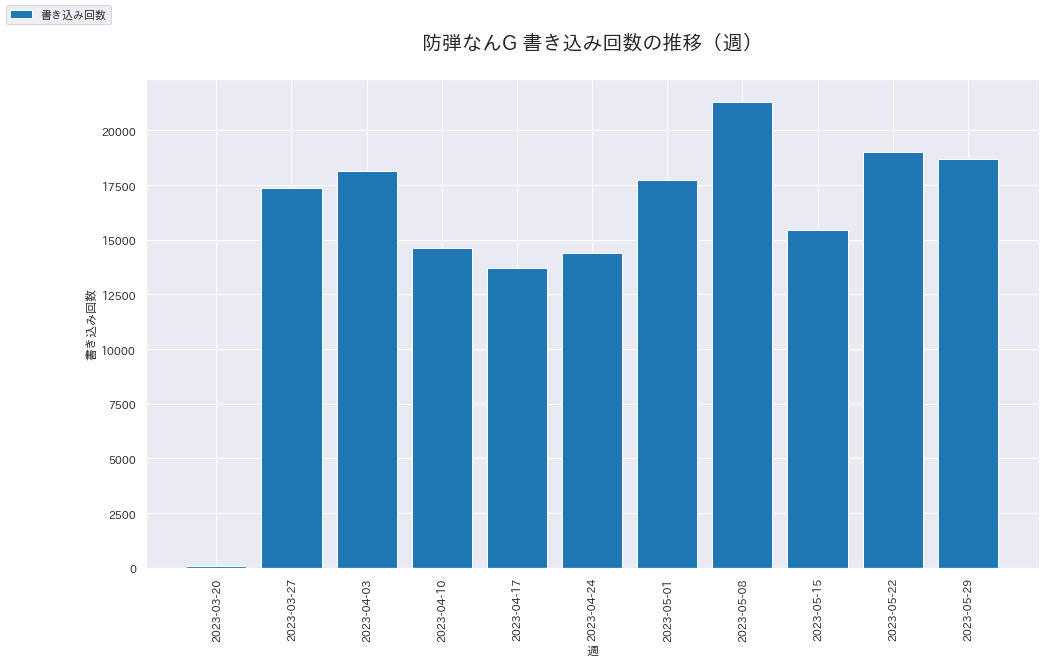

In [37]:
data = dailycount
sns.set(font=['IPAexGothic'])

df = pd.DataFrame(data, columns=['date', 'sum_comment'])
df['week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')  # 週を表す文字列を作成
weekly_data = df.groupby('week')['sum_comment'].sum()

fig, ax = plt.subplots(figsize=(16,9))

# 書き込み件数の棒グラフを描画する
ax.bar(weekly_data.index[::7], weekly_data[::7], color='tab:blue', label='書き込み回数')

# x軸のラベルを設定する
ax.set_xlabel('週')

# y軸のラベルを設定する
ax.set_ylabel('書き込み回数')

# グラフのタイトルを設定する
plt.title('防弾なんG 書き込み回数の推移（週）', fontsize=20, y=1.05)

# x軸の表示を縦書きにする
plt.xticks(rotation=90)

# 凡例を表示する
fig.legend(loc='upper left')

# グラフを表示する
plt.show()

2023-06-11 20:46:03.024 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:46:03.027 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


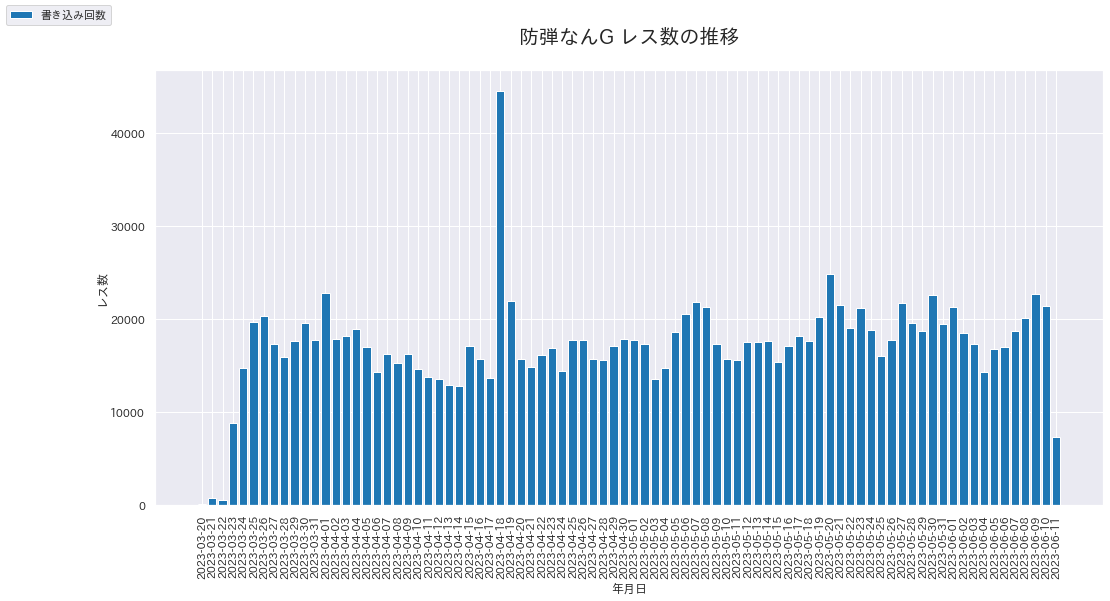

In [67]:
data = dailycount
sns.set(font=['IPAexGothic'])

df = pd.DataFrame(data, columns=['date', 'sum_comment'])

fig, ax = plt.subplots(figsize=(17,8))

# 書き込み件数の棒グラフを描画する
ax.bar(df['date'], df['sum_comment'], color='tab:blue', label='書き込み回数')

# X軸のラベルを設定する
ax.set_xlabel('年月日')

# Y軸のラベルを設定する
ax.set_ylabel('レス数')

# X軸のラベルの縦書きにする
plt.xticks(rotation=90)

# グラフのタイトルを設定する
plt.title('防弾なんG レス数の推移', fontsize=20, y=1.05)

# 凡例を表示する
fig.legend(loc='upper left')

# グラフを表示する
plt.show()



In [70]:
sql = f'SELECT strftime("%Y-%m-%d", comment_time) AS comment_date, COUNT(DISTINCT post_id) AS total_post_id FROM db_{NANG}  WHERE comment_time >= "2023-03-20" group by comment_date'
id_count = execute_sql_query(sql)
id_count

[('2023-03-20', 58),
 ('2023-03-21', 173),
 ('2023-03-22', 169),
 ('2023-03-23', 1107),
 ('2023-03-24', 2117),
 ('2023-03-25', 1988),
 ('2023-03-26', 2668),
 ('2023-03-27', 2650),
 ('2023-03-28', 2441),
 ('2023-03-29', 2402),
 ('2023-03-30', 2712),
 ('2023-03-31', 2745),
 ('2023-04-01', 2419),
 ('2023-04-02', 2834),
 ('2023-04-03', 2868),
 ('2023-04-04', 3121),
 ('2023-04-05', 2610),
 ('2023-04-06', 2703),
 ('2023-04-07', 2825),
 ('2023-04-08', 2376),
 ('2023-04-09', 2299),
 ('2023-04-10', 2593),
 ('2023-04-11', 2406),
 ('2023-04-12', 2351),
 ('2023-04-13', 2647),
 ('2023-04-14', 2425),
 ('2023-04-15', 2878),
 ('2023-04-16', 2525),
 ('2023-04-17', 2756),
 ('2023-04-18', 5439),
 ('2023-04-19', 3715),
 ('2023-04-20', 2860),
 ('2023-04-21', 2588),
 ('2023-04-22', 2464),
 ('2023-04-23', 2566),
 ('2023-04-24', 3232),
 ('2023-04-25', 5374),
 ('2023-04-26', 4701),
 ('2023-04-27', 4643),
 ('2023-04-28', 3711),
 ('2023-04-29', 4489),
 ('2023-04-30', 5155),
 ('2023-05-01', 4536),
 ('2023-05-02',

2023-06-11 20:48:07.341 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:48:07.344 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:48:07.411 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:48:07.445 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:48:07.478 INFO

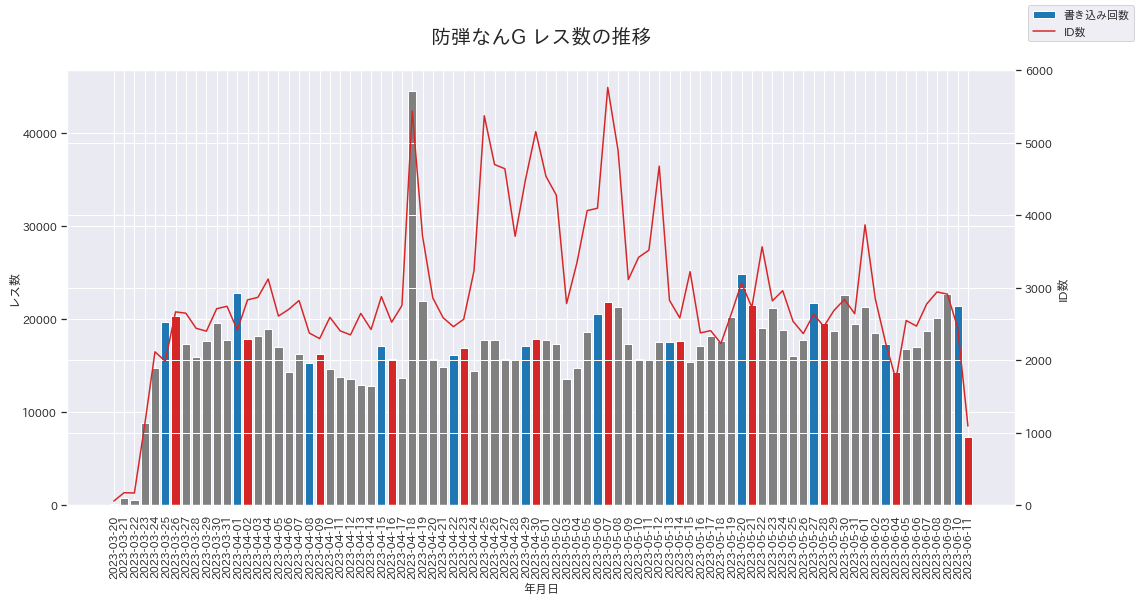

In [71]:
sns.set(font=['IPAexGothic'])

df1 = pd.DataFrame(data, columns=['date', 'sum_comment'])

fig, ax1 = plt.subplots(figsize=(17,8))

# 書き込み件数の棒グラフを描画する
ax1.bar(df1['date'], df1['sum_comment'], color='tab:blue', label='書き込み回数')

# X軸のラベルを設定する
ax1.set_xlabel('年月日')

# Y軸のラベルを設定する
ax1.set_ylabel('レス数')

# X軸のラベルの縦書きにする
plt.xticks(rotation=90)

# グラフのタイトルを設定する
plt.title('防弾なんG レス数の推移', fontsize=20, y=1.05)


# 日付の曜日を取得する
df1['day_of_week'] = pd.to_datetime(df1['date']).dt.dayofweek

# 土曜日は青、日曜日は赤にする
colors = ['tab:red' if x == 6 else 'tab:blue' if x == 5 else 'gray' for x in df1['day_of_week']]
ax1.bar(df1['date'], df1['sum_comment'], color=colors)


#折れ線グラフを描画する
data2 = id_count
df2 = pd.DataFrame(data2, columns=['date', 'id_count'])

ax2 = ax1.twinx()
ax2.plot(df2['date'], df2['id_count'], color='tab:red', label='ID数')
ax2.set_ylabel('ID数')
ax2.set_ylim(0, 6000)

# 凡例を表示する
fig.legend(loc='upper right')

# グラフを表示する
plt.show()

2023-06-11 20:46:19.225 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:46:19.229 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:46:19.292 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:46:19.319 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-06-11 20:46:19.322 INFO

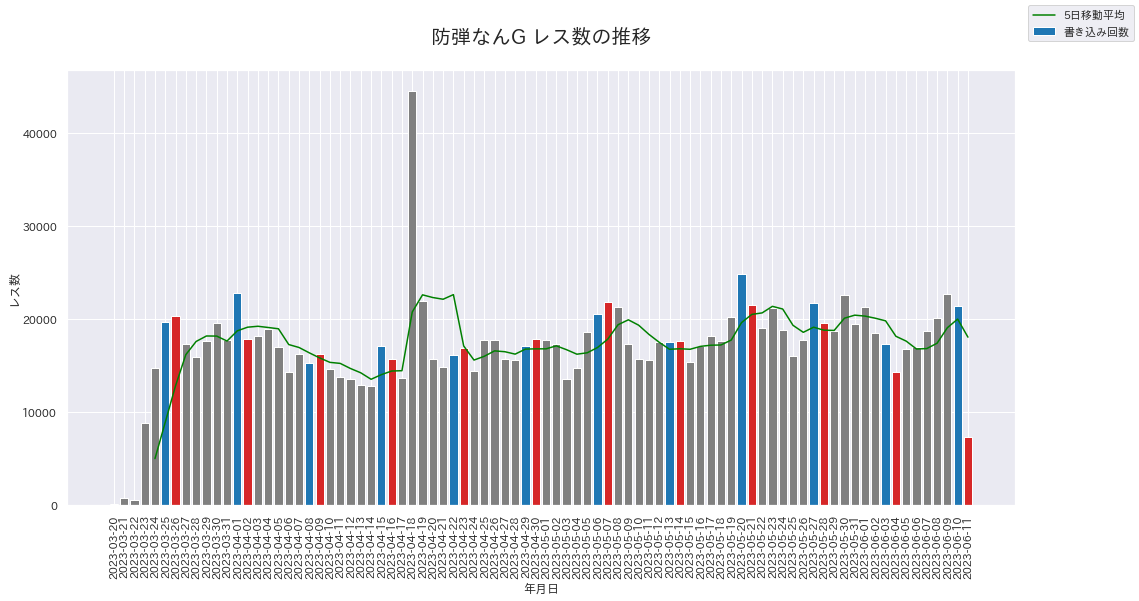

In [69]:
sns.set(font=['IPAexGothic'])

df1 = pd.DataFrame(data, columns=['date', 'sum_comment'])

fig, ax1 = plt.subplots(figsize=(17,8))

# 書き込み件数の棒グラフを描画する
ax1.bar(df1['date'], df1['sum_comment'], color='tab:blue', label='書き込み回数')

# X軸のラベルを設定する
ax1.set_xlabel('年月日')

# Y軸のラベルを設定する
ax1.set_ylabel('レス数')

# X軸のラベルの縦書きにする
plt.xticks(rotation=90)

# グラフのタイトルを設定する
plt.title('防弾なんG レス数の推移', fontsize=20, y=1.05)


# 日付の曜日を取得する
df1['day_of_week'] = pd.to_datetime(df1['date']).dt.dayofweek

# 土曜日は青、日曜日は赤にする
colors = ['tab:red' if x == 6 else 'tab:blue' if x == 5 else 'gray' for x in df1['day_of_week']]
ax1.bar(df1['date'], df1['sum_comment'], color=colors)


# n日移動平均を計算して折れ線グラフとして追加する
idou_niti = 5
moving_avg = df1['sum_comment'].rolling(window=idou_niti).mean()
ax1.plot(df1['date'], moving_avg, color='green', label=f'{idou_niti}日移動平均')

# 凡例を表示する
fig.legend(loc='upper right')

# グラフを表示する
plt.show()

In [57]:
from datetime import datetime, timedelta
from scraper import get_http_from_url, extract_thread_info_from_lines, extract_thread_content_from_dat

# base
BASE_URL = "https://sannan.nl"
KAKO_URL = "https://kako.sannan.nl"
#board
NANG = "livegalileo"
NANU = "liveuranus"
KENMO = "news1"

def check_unixtime_list_over_ndays(unixtime_list, n):
    """
    n日前未満のkeyを取得する
    """
    # 今日の日付を取得
    base_datetime = datetime.utcnow()

    # n日前以降の日付を求める
    delta = timedelta(days=n)
    target_datetime = base_datetime - delta

    # 判定結果を格納するリスト
    result_list = []

    # リストの要素を順に処理
    for unixtime_str in unixtime_list:
        # UNIX時間に変換
        unixtime = int(unixtime_str[0])

        # target_datetime以前かどうか判定
        if unixtime < int(target_datetime.timestamp()):
            # n日以上前なので、以降の要素はすべてn日以上前
            break
        else:
            # n日未満なので、次の要素に進む
            result_list.append(unixtime_str)

    return result_list



subjects = get_http_from_url(f"{KAKO_URL}/{board}/subject.txt")
lists = extract_thread_info_from_lines(subjects)

resllt = []
for i in lists:
    resllt.append(i)
    
af_lists = check_unixtime_list_over_ndays(resllt, 7)
len(af_lists)

5450

In [58]:
import requests
from time import sleep
from db_thread_detail_data import create_table_if_not_exists
from db_thread_detail_data import insert_to_table

def main(af_lists):
    """
    メイン処理。アクセス間隔を調整してクラウドフレアによるDDoS攻撃として認識されないようにする。
    """
    try:
        result = []
        each_line = af_lists

        for keys in each_line:
            thread_url = f"{KAKO_URL}/{board}/dat/{keys[0]}.dat"

            try:
                res_list = get_http_from_url(thread_url)
                if res_list is None:
                    raise requests.exceptions.HTTPError

                key = keys[0]
                thread_title = keys[1]

                for i, res in enumerate(res_list):
                    res_num = i + 1
                    thread_data = list(extract_thread_content_from_dat(res)) # 連結のためにリストに変換
                    result.append([key, res_num] + thread_data + [thread_title])

                sleep(1) # アクセス間隔を設定

            except requests.exceptions.HTTPError as e:
                print(f"HTTPエラーが発生しました KEY {keys}: {e}")
                continue

    except Exception as e:
        raise e

    return result

In [59]:
modi_lists = main(af_lists)

In [60]:
NANG = "livegalileo"
NANU = "liveuranus"
table_name = "db_" + board

insert_to_table(table_name, modi_lists)

error:time data '2023/06/10(土&#129317;&#10024;) 21:21:21.75' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time data '2023/06/10(土&#129317;&#10024;) 21:21:30.91' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time data '2023/06/10(土&#129317;&#10024;) 21:21:41.65' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time data '2023/06/10(土&#129317;&#10024;) 21:22:03.44' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time data '2023/06/10(土&#129317;&#10024;) 21:22:03.69' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time data '2023/06/10(土&#129317;&#10024;) 21:22:14.94' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time data '2023/06/10(土&#129317;&#10024;) 21:22:21.71' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time data '2023/06/10(土&#129317;&#10024;) 21:22:36.46' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time data '2023/06/10(土&#129317;&#10024;) 21:22:59.72' does not match format '%Y/%m/%d(%a) %H:%M:%S.%f'
error:time